# Genet Sebehat
## MSDS696 Practicum II - Default of Credit Card Clients Dataset Project

### Introduction
I will analyze how the probability of payment default varies according to categories of different demographic variables.  In addition, I will identify which variables are the strongest predictors of payment defaults. My main goal in this project is to predict which credit card holders will default in the upcoming month. The model I will build here will use all possible factors to predict data on customers to identify which will be defaulters. In other words, the goal is to identify whether clients will pay, or be able to pay, the amount due for next month’s bill.  

### Methods and Results

#### Dataset

Default of Credit Card Client dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Default of Credit Card Client dataset Content

The Dataset and its attributes are described below:

    . ID: ID of each client
    . LIMIT_BAL: Amount of given credit in NT dollars (includes individual 
      and family/supplementary credit
    . SEX: Gender (1=male, 2=female)
    . EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 
      5=unknown, 6=unknown)
    . MARRIAGE: Marital status (1=married, 2=single, 3=others)
    . AGE: Age in years
    . PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment 
      delay for one month, 2=payment delay for two months, ... . 8=payment 
      delay for eight months, 9=payment delay for nine months and above)
    . PAY_2: Repayment status in August 2005 (same scale as above)
    . PAY_3: Repayment status in July 2005 (same scale as above)
    . PAY_4: Repayment status in June 2005 (same scale as above)
    . PAY_5: Repayment status in May 2005 (same scale as above)
    . PAY_6: Repayment status in April 2005 (same scale as above)
    . BILL_AMT1: Amount of bill statement in September 2005 (NT dollar)
    . BILL_AMT2: Amount of bill statement in August 2005 (NT dollar)
    . BILL_AMT3: Amount of bill statement in July 2005 (NT dollar)
    . BILL_AMT4: Amount of bill statement in June 2005 (NT dollar)
    . BILL_AMT5: Amount of bill statement in May 2005 (NT dollar)
    . BILL_AMT6: Amount of bill statement in April 2005 (NT dollar)
    . PAY_AMT1: Amount of previous payment in September 2005 (NT dollar)
    . PAY_AMT2: Amount of previous payment in August 2005 (NT dollar)
    . PAY_AMT3: Amount of previous payment in July 2005 (NT dollar)
    . PAY_AMT4: Amount of previous payment in June 2005 (NT dollar)
    . PAY_AMT5: Amount of previous payment in May 2005 (NT dollar)
    . PAY_AMT6: Amount of previous payment in April 2005 (NT dollar)
    . default.payment.next.month: Default payment (1=yes, 0=no)

#### Default of Credit Card Client datasest has 30000 rows and 25 variables.  
###### This dataset has the following data types:
    . Integer:  20
    . Decimal:   4
    . Key Id:    1

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data using pandas
CreditCard_dataset = pd.read_csv('C:/Users/owner/Desktop/Regis University/MSDS696/Data Set/UCI_Credit_Card.csv')

# Take sample only 2000 rows for analysis purpose
CreditCard_dataset = CreditCard_dataset.sample(n=2000, replace = False, random_state=1)

# load all data set
CreditCard_dataset1 = pd.read_csv('C:/Users/owner/Desktop/Regis University/MSDS696/Data Set/UCI_Credit_Card.csv')

In [3]:
# Check number of rows and columns in dataset
CreditCard_dataset1.shape

(30000, 25)

In [4]:
# Returns the first few rows
CreditCard_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [5]:
# Returns the last few rows
CreditCard_dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23295,23296,160000.0,2,1,2,25,-1,0,-1,-1,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15148,15149,250000.0,1,1,1,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18666,18667,50000.0,2,1,2,23,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3415,3416,200000.0,2,2,1,37,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18714,18715,420000.0,2,1,2,28,0,0,-1,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


In [6]:
# View some basic statistical details of the sample data
CreditCard_dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,...,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,...,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,...,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


#### Summary of the above description:
 
1. There are 2,000 distinct credit card clients.

2. The average credit limit was 171,825. The standard deviation is unusually large, with the max value being 1M.

3. Education level is mostly graduate school or university.

4. Most of the clients are either married or single.

5. Average age is 35.5 years, with a standard deviation of 9.1.

6. As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that 21.9% of credit card contracts will default next month (this will be verified in subsequent sections of this analysis).


In [7]:
# Print a concise summary of a sample data
CreditCard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
ID                            2000 non-null int64
LIMIT_BAL                     2000 non-null float64
SEX                           2000 non-null int64
EDUCATION                     2000 non-null int64
MARRIAGE                      2000 non-null int64
AGE                           2000 non-null int64
PAY_0                         2000 non-null int64
PAY_2                         2000 non-null int64
PAY_3                         2000 non-null int64
PAY_4                         2000 non-null int64
PAY_5                         2000 non-null int64
PAY_6                         2000 non-null int64
BILL_AMT1                     2000 non-null float64
BILL_AMT2                     2000 non-null float64
BILL_AMT3                     2000 non-null float64
BILL_AMT4                     2000 non-null float64
BILL_AMT5                     2000 non-null float64
BILL_AMT6                 

In [8]:
# print a concise summary of a DataFrame
CreditCard_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [9]:
# View some basic statistical details
CreditCard_dataset1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Summary of the above description:

1. There are 30,000 distinct credit card clients.

2. The average credit limit was 167,484. 

3. The standard deviation is unusually large, max value being 1M.

4. Education level is mostly graduate school and university.

5. Most of the clients are either marrined or single.

6. Average age is 35.5 years, with a standard deviation of 9.2.

7. As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that 22.1% of credit card contracts will default next month (this will be verified in subsequent sections of this analysis).


In [10]:
# Check data type of the dataframe
CreditCard_dataset.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [11]:
# Pass a list of columns to []
CreditCard_dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

#### Data wrangling

Data wrangling is the process of cleaning data by either removing rows with missing values or inputting missing values.

##### Data cleaning Part I

In [12]:
# Checking NaN values if there is any then data will be cleaned
for column in CreditCard_dataset:
    if CreditCard_dataset[column].isnull().values.any():
        print ("NaN value/s detected in ") + column
    else:
        print ("{} is doesn't have null values".format(column))

ID is doesn't have null values
LIMIT_BAL is doesn't have null values
SEX is doesn't have null values
EDUCATION is doesn't have null values
MARRIAGE is doesn't have null values
AGE is doesn't have null values
PAY_0 is doesn't have null values
PAY_2 is doesn't have null values
PAY_3 is doesn't have null values
PAY_4 is doesn't have null values
PAY_5 is doesn't have null values
PAY_6 is doesn't have null values
BILL_AMT1 is doesn't have null values
BILL_AMT2 is doesn't have null values
BILL_AMT3 is doesn't have null values
BILL_AMT4 is doesn't have null values
BILL_AMT5 is doesn't have null values
BILL_AMT6 is doesn't have null values
PAY_AMT1 is doesn't have null values
PAY_AMT2 is doesn't have null values
PAY_AMT3 is doesn't have null values
PAY_AMT4 is doesn't have null values
PAY_AMT5 is doesn't have null values
PAY_AMT6 is doesn't have null values
default.payment.next.month is doesn't have null values


In [13]:
# The index (row labels) of the DataFrame
CreditCard_dataset.index = CreditCard_dataset['ID']

In [14]:
# Returns the first three rows
CreditCard_dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [15]:
# Drop ID column by index
CreditCard_dataset.drop('ID', axis=1, inplace=True)

In [16]:
# Retruned the first three rows to check it to the drop column
CreditCard_dataset.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [17]:
# Pass a list of columns to [] 
CreditCard_dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [18]:
# Give the column-wise sum of missing values
CreditCard_dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [19]:
# Sort rows of a data frame in descending order of NaN counts
total = CreditCard_dataset.isnull().sum().sort_values(ascending = False)
# Sort rows of a data frame in descending order of NaN counts and retrun percentage
percent = (CreditCard_dataset.isnull().sum()/CreditCard_dataset.isnull().count()*100).sort_values(ascending = False)
# It reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default.payment.next.month,PAY_AMT6,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,LIMIT_BAL
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data unbalance
I checked the data unbalance with respect to the target value, i.e., “default.payment.next.month”.

No handles with labels found to put in legend.


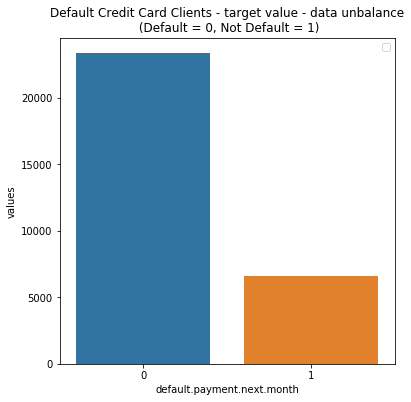

In [20]:
# Count default payment
x = CreditCard_dataset1["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': x.index,'values': x.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.legend(loc='upper right')
plt.show()

#### Descriptive Statistics
A descriptive statistic is a summary statistic that quantitatively describes or summarizes features of a collection of information, while descriptive statistics is the process of using and analyzing those statistics. In other words, descriptive statistics is the use of data analysis to describe, show, or summarize data in a meaningful way (William M.K. 2020).

In [21]:
# Print summary of basic statistical details
print(CreditCard_dataset.describe())

           LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   171825.000000     1.603000     1.853000     1.555000    35.458000   
std    131598.930521     0.489398     0.798567     0.516825     9.144892   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     60000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    34.000000   
75%    250000.000000     2.000000     2.000000     2.000000    41.000000   
max    730000.000000     2.000000     6.000000     3.000000    71.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean     -0.024500    -0.138500    -0.179500    -0.213000    -0.250000  ...   
std       1.103861     1.163613     1.177698     1.166753     1.135405  ...   

In [22]:
# import set_option from pandas package
from pandas import set_option

# Sets the value of the specified option/maximum 100 rows
set_option('display.width', 100)
# Set the output precision to 2
set_option('precision', 2)

print("Summary of Statistics of Numeric Attributes")
print()
print(CreditCard_dataset1.describe().T)

Summary of Statistics of Numeric Attributes

                              count       mean        std       min       25%       50%  \
ID                          30000.0   15000.50    8660.40       1.0   7500.75   15000.5   
LIMIT_BAL                   30000.0  167484.32  129747.66   10000.0  50000.00  140000.0   
SEX                         30000.0       1.60       0.49       1.0      1.00       2.0   
EDUCATION                   30000.0       1.85       0.79       0.0      1.00       2.0   
MARRIAGE                    30000.0       1.55       0.52       0.0      1.00       2.0   
AGE                         30000.0      35.49       9.22      21.0     28.00      34.0   
PAY_0                       30000.0      -0.02       1.12      -2.0     -1.00       0.0   
PAY_2                       30000.0      -0.13       1.20      -2.0     -1.00       0.0   
PAY_3                       30000.0      -0.17       1.20      -2.0     -1.00       0.0   
PAY_4                       30000.0      -0.2

1. The average credit limit was 167,484 NT dollars. 
2. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
3. Education level is mostly graduate school (1) and university (2). 
4. Most of the clients are either marrined or single.
5. Average age is 35.5 years, with a standard deviation of 9.2 years.

In [23]:
# Basic Descriptive statistics
np.round(CreditCard_dataset.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
LIMIT_BAL,2000.0,171825.00,131598.93,10000.0,7.30e+05
SEX,2000.0,1.60,0.49,1.0,2.00e+00
EDUCATION,2000.0,1.85,0.80,1.0,6.00e+00
MARRIAGE,2000.0,1.56,0.52,0.0,3.00e+00
AGE,2000.0,35.46,9.14,21.0,7.10e+01
PAY_0,2000.0,-0.02,1.10,-2.0,6.00e+00
PAY_2,2000.0,-0.14,1.16,-2.0,5.00e+00
PAY_3,2000.0,-0.18,1.18,-2.0,8.00e+00
PAY_4,2000.0,-0.21,1.17,-2.0,7.00e+00
PAY_5,2000.0,-0.25,1.14,-2.0,7.00e+00


In [24]:
# Alternative way of writing descriptive statistics
np.round(CreditCard_dataset.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,2000.0,171825.00,131598.93,10000.0,60000.00,140000.0,250000.00,7.30e+05
SEX,2000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.00e+00
EDUCATION,2000.0,1.85,0.80,1.0,1.00,2.0,2.00,6.00e+00
MARRIAGE,2000.0,1.56,0.52,0.0,1.00,2.0,2.00,3.00e+00
AGE,2000.0,35.46,9.14,21.0,28.00,34.0,41.00,7.10e+01
PAY_0,2000.0,-0.02,1.10,-2.0,-1.00,0.0,0.00,6.00e+00
PAY_2,2000.0,-0.14,1.16,-2.0,-1.00,0.0,0.00,5.00e+00
PAY_3,2000.0,-0.18,1.18,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_4,2000.0,-0.21,1.17,-2.0,-1.00,0.0,0.00,7.00e+00
PAY_5,2000.0,-0.25,1.14,-2.0,-1.00,0.0,0.00,7.00e+00


In [25]:
# Display a concise summary of a DataFrame
CreditCard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10748 to 18715
Data columns (total 24 columns):
LIMIT_BAL                     2000 non-null float64
SEX                           2000 non-null int64
EDUCATION                     2000 non-null int64
MARRIAGE                      2000 non-null int64
AGE                           2000 non-null int64
PAY_0                         2000 non-null int64
PAY_2                         2000 non-null int64
PAY_3                         2000 non-null int64
PAY_4                         2000 non-null int64
PAY_5                         2000 non-null int64
PAY_6                         2000 non-null int64
BILL_AMT1                     2000 non-null float64
BILL_AMT2                     2000 non-null float64
BILL_AMT3                     2000 non-null float64
BILL_AMT4                     2000 non-null float64
BILL_AMT5                     2000 non-null float64
BILL_AMT6                     2000 non-null float64
PAY_AMT1                

In [26]:
# Looking unique values
print(CreditCard_dataset.nunique())
# Looking the data
print(CreditCard_dataset.head())

LIMIT_BAL                       61
SEX                              2
EDUCATION                        6
MARRIAGE                         4
AGE                             48
PAY_0                            8
PAY_2                            8
PAY_3                            7
PAY_4                            8
PAY_5                            8
PAY_6                            9
BILL_AMT1                     1818
BILL_AMT2                     1764
BILL_AMT3                     1736
BILL_AMT4                     1726
BILL_AMT5                     1698
BILL_AMT6                     1660
PAY_AMT1                      1029
PAY_AMT2                      1013
PAY_AMT3                       954
PAY_AMT4                       915
PAY_AMT5                       908
PAY_AMT6                       872
default.payment.next.month       2
dtype: int64
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  ...  \
ID                                                      

### Data preprocessing

Data preprocessing refers to the steps applied to make data more suitable for data mining. The steps used for data preprocessing usually fall into two categories:
1.	Selecting data objects and attributes for the analysis.
2.	Creating/changing the attributes

#### Data preprocessing part I

In [27]:
# Count education by category 
CreditCard_dataset['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

In [28]:
# Count sex by category 
CreditCard_dataset['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [29]:
# Rename columns
CreditCard_dataset = CreditCard_dataset.rename(columns={'default.payment.next.month': 'default_pay',
                       'PAY_0': 'PAY_1'})
# Display the frist few rows to see the new columns name
CreditCard_dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [30]:
# Pass a list of columns to [] 
CreditCard_dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')

#### Data preprocessing part II

In [31]:
# Looking unique values
print(CreditCard_dataset.EDUCATION.nunique())

6


In [32]:
# Get the unique values and their frequency of variable EDUCATION by category
CreditCard_dataset['EDUCATION'].value_counts()

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

##### Data cleaning Part II

#### Data Transformation I
    
The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put into the “Other” category (thus 4).

The loc () function is used to access a group of rows and columns by label(s) or by boolean array.

. .loc[] is primarily label based, but may also be used with a boolean array.


In [33]:
# EDUCATION has category 5 and 6 that are unlabelled or unknown
x = (CreditCard_dataset.EDUCATION == 5) | (CreditCard_dataset.EDUCATION == 6) | (CreditCard_dataset.EDUCATION == 0)
CreditCard_dataset.loc[x, 'EDUCATION'] = 4
# Count values by category
CreditCard_dataset.EDUCATION.value_counts()

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

#### Data Transformation II
. The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

In [34]:
# MARRIAGE has three category
CreditCard_dataset.loc[CreditCard_dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
# Count by category
CreditCard_dataset.MARRIAGE.value_counts()

2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

In [35]:
# Descriptive statistics of "PAY_1" column
CreditCard_dataset['PAY_1'].describe()

count    2000.00
mean       -0.02
std         1.10
min        -2.00
25%        -1.00
50%         0.00
75%         0.00
max         6.00
Name: PAY_1, dtype: float64

In [36]:
# Descriptive statistics of "PAY_AMT1", "PAY_AMTx" columns
CreditCard_dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2000.00,2.00e+03,2000.00,2000.00,2000.00,2000.00
mean,5153.11,6.36e+03,6096.21,5091.07,5043.29,5738.56
std,13065.16,4.01e+04,21880.63,16197.84,16448.82,21310.32
min,0.00,0.00e+00,0.00,0.00,0.00,0.00
25%,1000.00,9.95e+02,445.50,328.25,260.25,166.75
50%,2022.50,2.03e+03,1843.00,1597.50,1500.00,1464.00
75%,5000.00,5.00e+03,5000.00,4295.50,4207.75,4000.00
max,276698.00,1.68e+06,400972.00,331788.00,379267.00,403500.00


In [37]:
# Descriptive statistics of "BILL_AMT1", "BILL_AMTx" columns
CreditCard_dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2000.00,2000.00,2.00e+03,2000.00,2000.00,2000.00
mean,53341.09,50172.80,4.82e+04,44390.10,41502.59,39643.92
std,76676.07,72959.31,7.85e+04,65827.28,61928.13,60472.02
min,-8187.00,-18088.00,-9.03e+03,-81334.00,-15306.00,-51443.00
25%,3974.75,3057.75,3.05e+03,2939.50,2158.75,1319.25
50%,23410.00,21378.50,2.05e+04,19454.00,18652.00,17621.50
75%,70972.50,65359.50,6.06e+04,53394.25,51005.50,49484.75
max,746814.00,562316.00,1.66e+06,487066.00,489200.00,513798.00


### Use EDA to understand the data
.	Explanatory data analysis (EDA)
.	Exploring and visualizing data helps to validate the business’s assumptions via thorough investigation
.	It avoids any potential anomalies in data to avoid feeding incorrect data to a machine learning model
.	It clarifies the model’s output and tests its assumptions

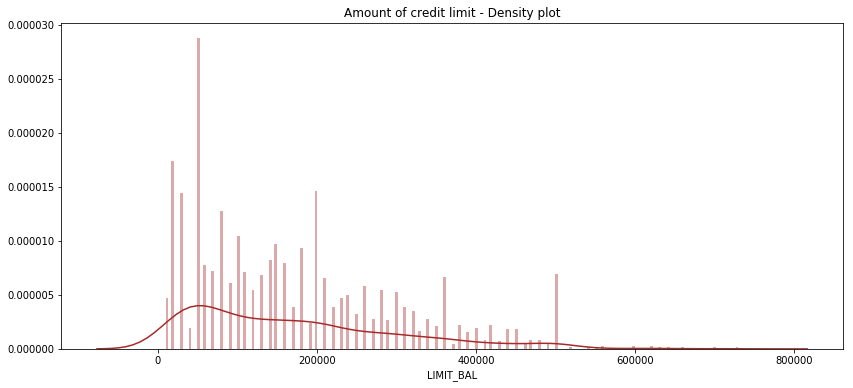

In [38]:
# Display the amount of credit limit using plot
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density plot')
sns.set_color_codes("pastel")
sns.distplot(CreditCard_dataset['LIMIT_BAL'],kde=True,bins=200, color="brown")
plt.show()

##### Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [39]:
# Stores the number of rows as a tuple and Count "LIMIT_BAL" vlaues
CreditCard_dataset['LIMIT_BAL'].value_counts().shape

(61,)

In [40]:
# Counts the "LIMIT_BAL" values and dispaly the first few rows
CreditCard_dataset['LIMIT_BAL'].value_counts().head(5)

50000.0     207
20000.0     125
200000.0    105
30000.0     104
80000.0      92
Name: LIMIT_BAL, dtype: int64

The largest number of credit cards have credit limits of 50,000 (207), followed by 20,000 (125), followed by 200,000 (105) and, finally, 30,000 (104).

##### Credit limit grouped by payment default in the following month

The figure below displays the density plot for credit limit (LIMIT_BAL) grouped by default payment next month.

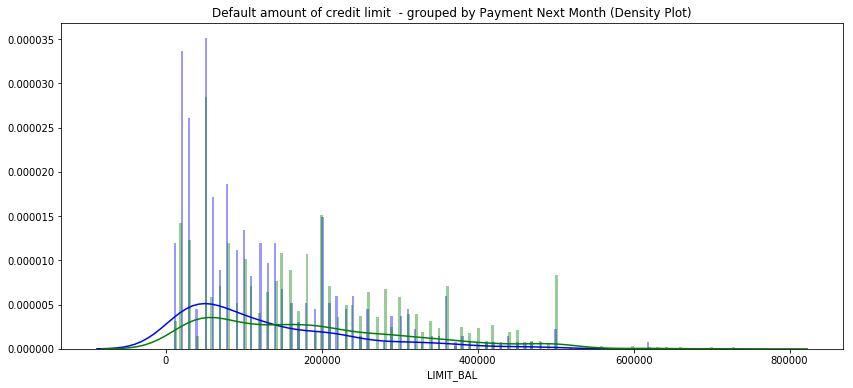

In [41]:
# Grouped by default payment next month and display using plot graph
class_a = CreditCard_dataset.loc[CreditCard_dataset['default_pay'] == 0]["LIMIT_BAL"]
class_b = CreditCard_dataset.loc[CreditCard_dataset['default_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_b,kde=True,bins=200, color="blue")
sns.distplot(class_a,kde=True,bins=200, color="green")
plt.show()

##### Most defaults occurred for credit limits between 0 - 100,000 (and density for this interval is larger for defaults than for non-defaults). The greatest number of defaults occurred among clients with credit limits of 50,000, 20,000, and 30,000, in that order. 

##### Credit limit vs. sex
Checking the credit limit distribution vs. sex. For sex, 1 stands for male and 2 for female.

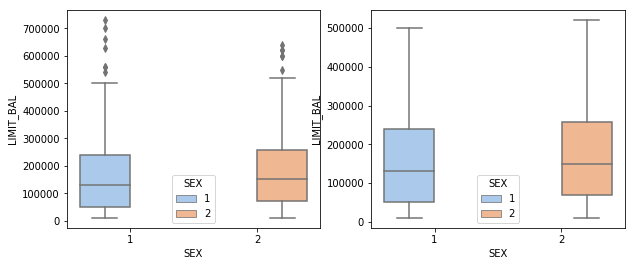

In [42]:
# Shows boxplot graphs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
sn = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=CreditCard_dataset, palette="pastel",showfliers=True)
sn = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=CreditCard_dataset, palette="pastel",showfliers=False)
plt.show();

##### Credit limit amount is quite balanced between sexes. Men have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean, while women have a larger outlier max value (above 700,000 NT dollars).

Text(0.5, 1.0, 'EDUCATION vs COUNT')

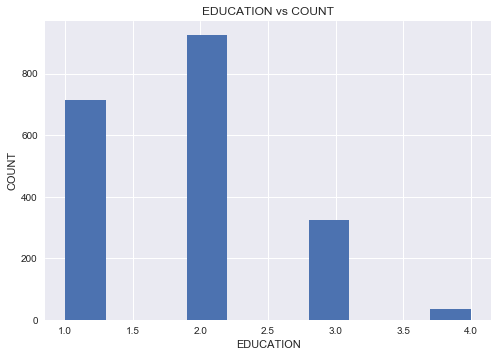

In [43]:
# Shows "EDUCATION vs COUNT" using histogram
plt.style.use('seaborn')
CreditCard_dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION vs COUNT')

##### The highest credit limits were college students, graduate students, and high school graduates.

Text(0.5, 1.0, 'MARRIAGE vs COUNT')

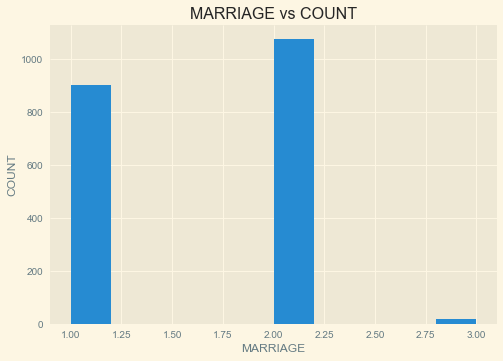

In [44]:
# Using plot Shows "MARRIAGE vs COUNT" graph
plt.style.use('Solarize_Light2')
CreditCard_dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE vs COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

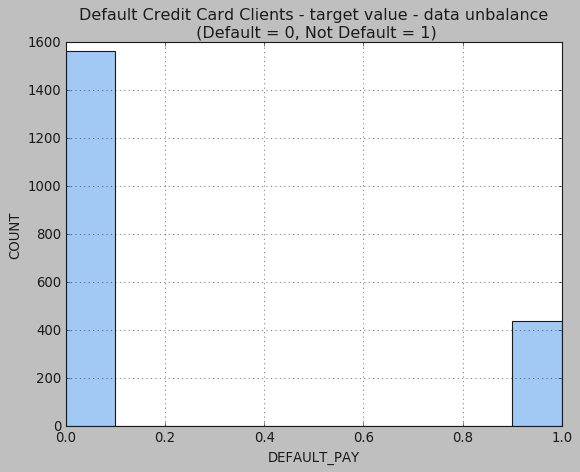

In [45]:
# Shows default and not default plot
plt.style.use('classic')
CreditCard_dataset['default_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

##### Most credit card holders were married.

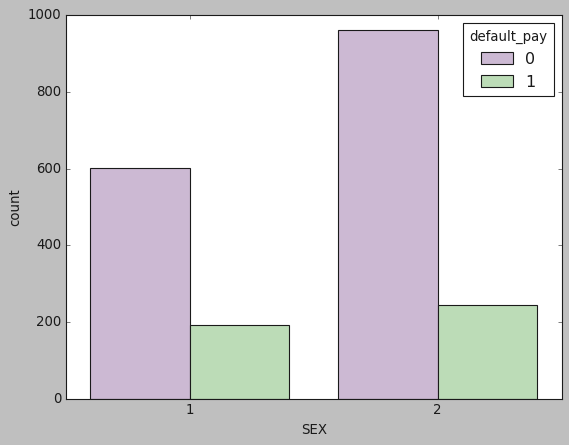

In [46]:
# Check the number of counts of defaulters and non defaulters gender wise
sns.countplot(x='SEX', data=CreditCard_dataset,hue="default_pay", palette="PRGn")

##### It is evident from the above output that females have overall less default payments than males
##### Non-Defaults have a higher proportion of Females (Sex=2)

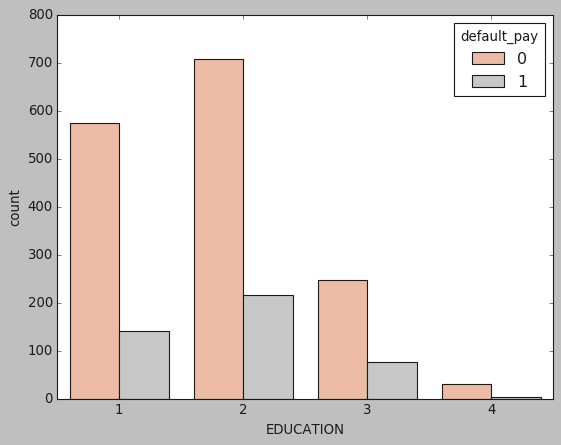

In [47]:
# Plot "Education" vs "count"
gr = sns.countplot(x="EDUCATION", data=CreditCard_dataset, hue="default_pay", palette="RdGy")

#### As the above plot shows those people who are university students have less payment defaults than graduates and high school people

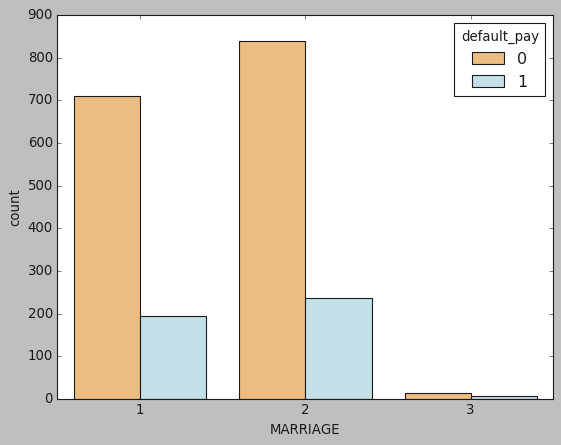

In [48]:
# Plot "Marriage" vs count
gr = sns.countplot(x="MARRIAGE", data=CreditCard_dataset,hue="default_pay", palette="RdYlBu")

#### As displays the above plot it is clear that those people who have marital status single have less default payment wrt married status people

In [49]:
# Create getColumnsNames function
def getColumnsNames(prefix):
    return [prefix+str(i) for i in range(1,7)]

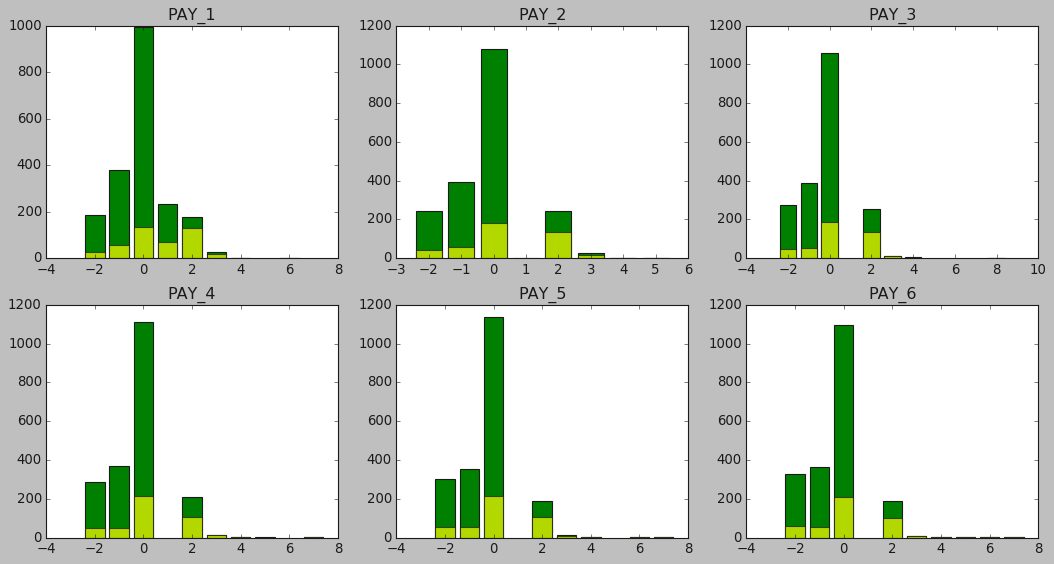

In [50]:
# Get PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
PaymentStatus_columns = getColumnsNames('PAY_')
# Display two rows and three columns
figure, ax = plt.subplots(2,3)
# Displays 16 by 8 inches
figure.set_size_inches(16,8)

# for loop to iterate "PaymentStatus_columns"
for p in range(len(PaymentStatus_columns)):
    # payment status devided by 3
    row, col = int(p/3), p%3

    # count "PaymentStatus_columns" value and assign to d
    d  = CreditCard_dataset[PaymentStatus_columns[p]].value_counts()
    i = CreditCard_dataset[PaymentStatus_columns[p]][(CreditCard_dataset['default_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(i.index, i, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(PaymentStatus_columns[p])
    
plt.show()

#### The above figure show bar plots for each month’s payment status, showing the count of defaulters and non-defaulters.

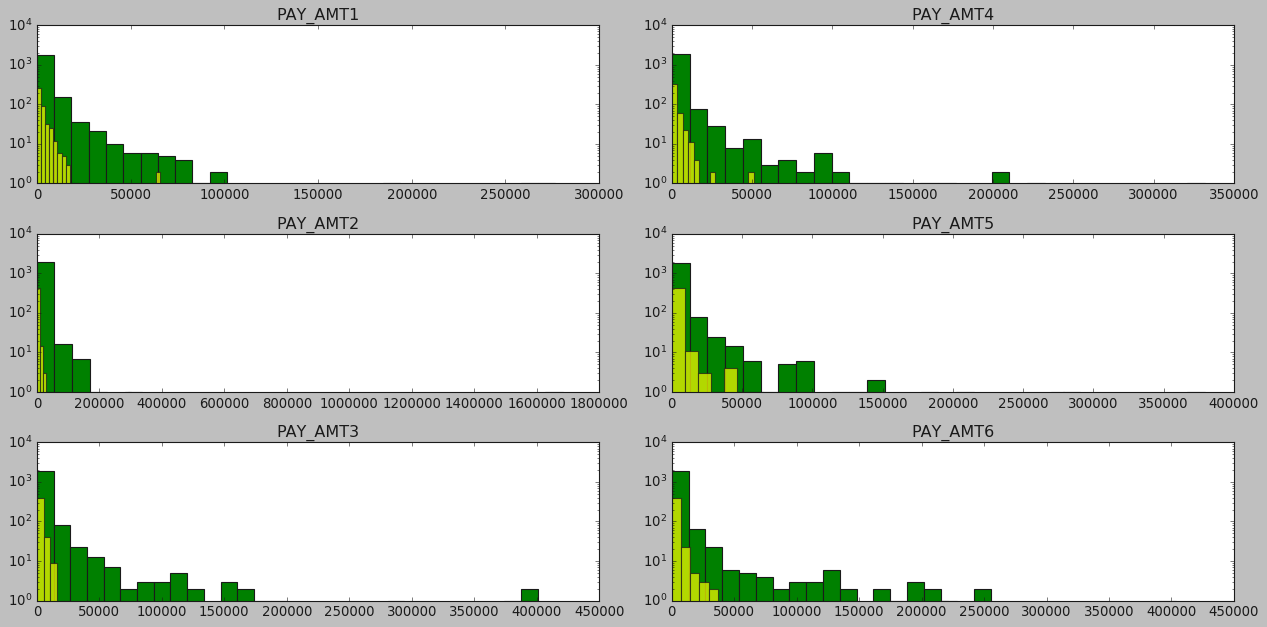

In [51]:
# Get PAY_AMT1 , PAY_AMT2 , PAY_AMT3 , PAY_AMT4 , PAY_AMT5, PAY_AMT6
PaymentAmount_columns = getColumnsNames('PAY_AMT')
# Displays three rows and two columns
figure, ax = plt.subplots(3,2)
# Displays 16 by 8 inches
figure.set_size_inches(16,8)

# for loop to iterate "PaymentAmount_columns"
for i in range(len(PaymentAmount_columns)):
    row, col =  i%3, int(i/3)
   
    ax[row,col].hist(CreditCard_dataset[PaymentAmount_columns[i]], 30, color ='green')
    ax[row,col].hist(CreditCard_dataset[PaymentAmount_columns[i]][(CreditCard_dataset['default_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(PaymentAmount_columns[i])
    
    # add scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

#### The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

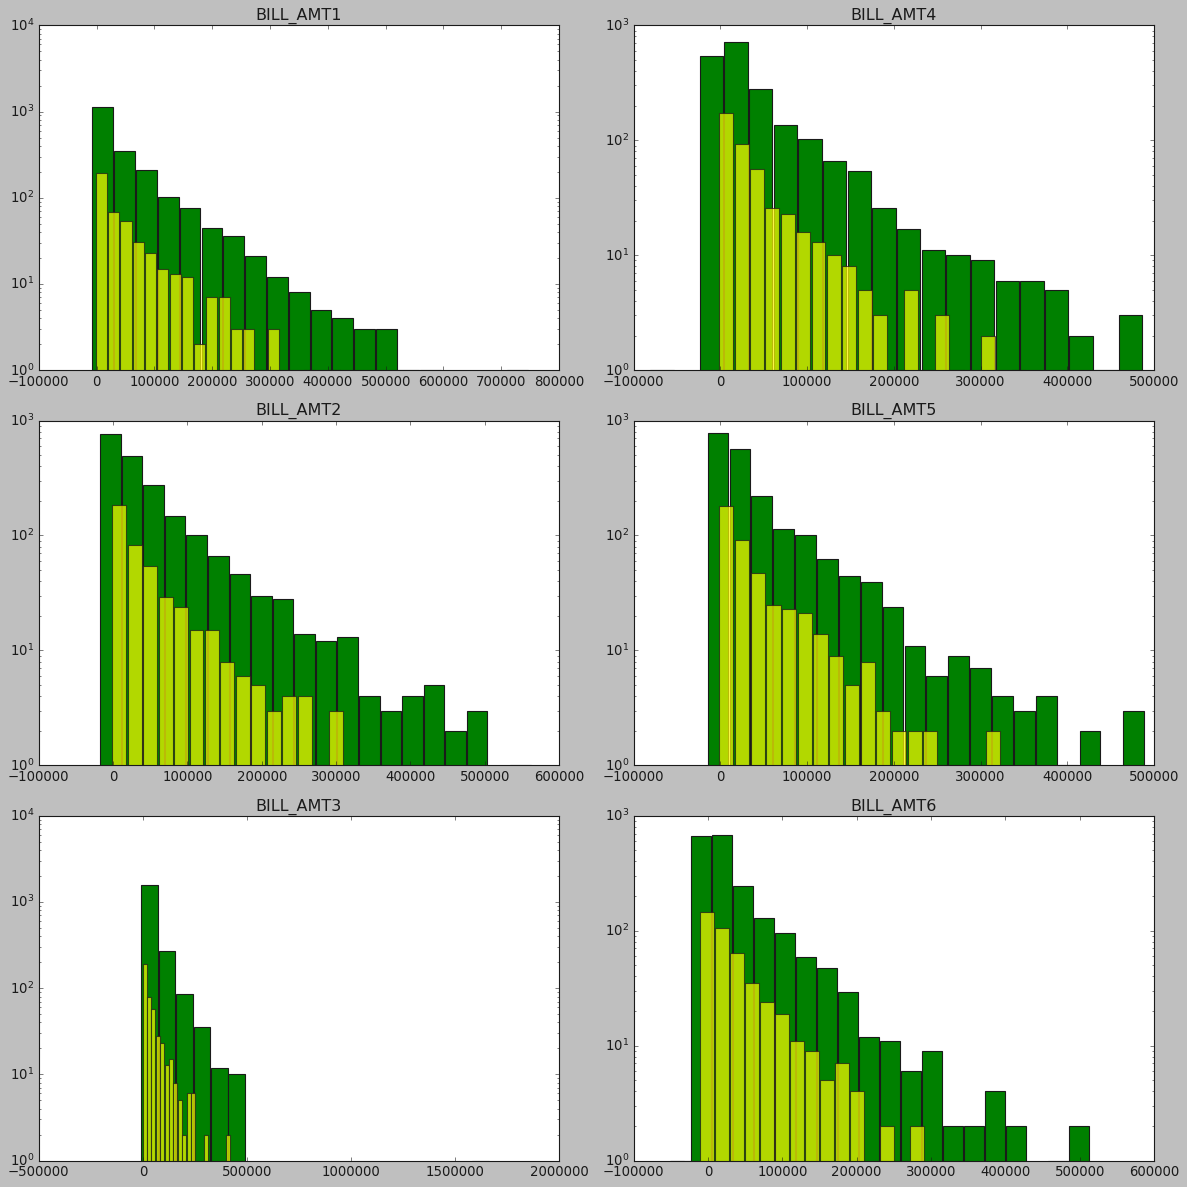

In [52]:
# Get BILL_AMT1 , BILL_AMT2 , BILL_AMT3 , BILL_AMT4 , BILL_AMT5, BILL_AMT6
BillAmount_columns =  getColumnsNames('BILL_AMT')
# Display three rows and two columns
figure, axs = plt.subplots(3,2)
# Display 15 by 15 inches
figure.set_size_inches(15,15)


for i in range(len(PaymentStatus_columns)):
    row,col =  i%3, int(i/3)
   
    axs[row,col].hist(CreditCard_dataset[BillAmount_columns[i]], 20,rwidth=0.95, color ='green')
    axs[row,col].hist(CreditCard_dataset[BillAmount_columns[i]][(CreditCard_dataset['default_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    axs[row,col].set_title(BillAmount_columns[i])
    #adding scaling to make the graph more helpful
    axs[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

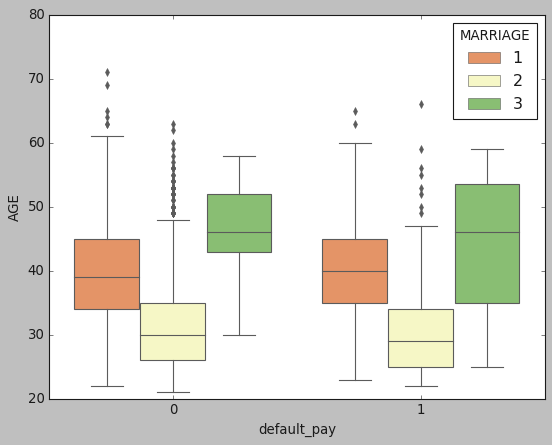

In [53]:
# Displays boxplot "default_pay" vs "AGE" with hue="MARRIAGE" of variables 
sns.boxplot(x='default_pay',hue='MARRIAGE', y='AGE',data=CreditCard_dataset,palette="RdYlGn")

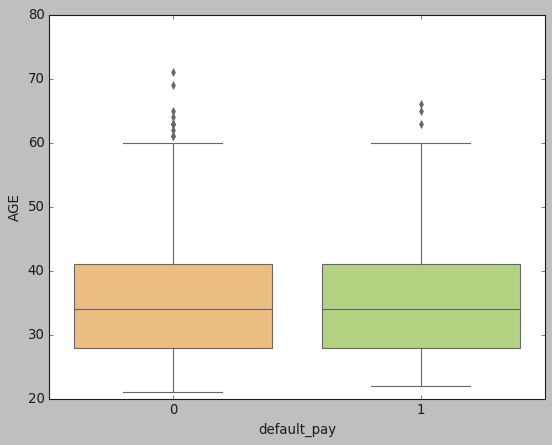

In [54]:
# Displays boxplot "default_pay" by "AGE"
sns.boxplot(x='default_pay',y='AGE',data=CreditCard_dataset,palette='RdYlGn')

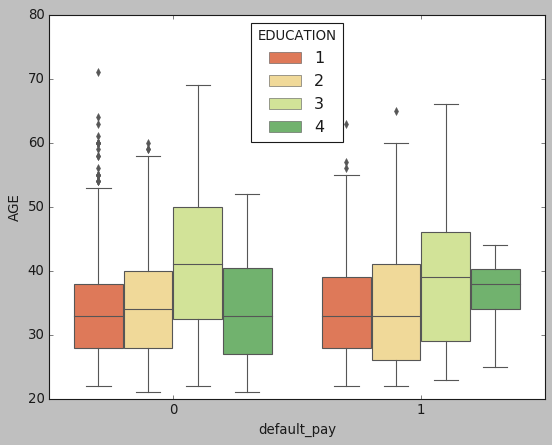

In [55]:
# Displays boxplot "default_pay" by "EDUCATION" 
sns.boxplot(x='default_pay',hue='EDUCATION', y='AGE',data=CreditCard_dataset,palette="RdYlGn")

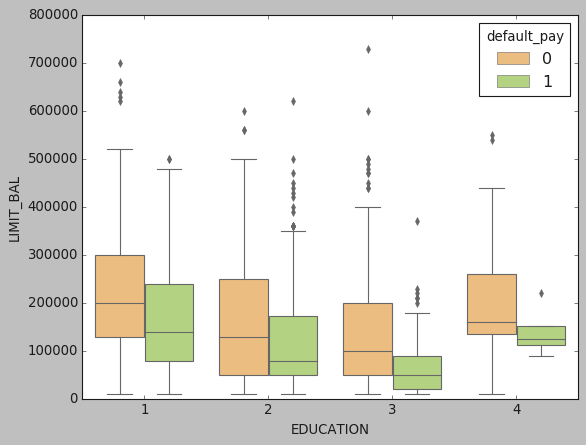

In [56]:
# Displays boxplot "EDUCATION" vs "LIMIT_BAL" with hue="default_pay" of variables 
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='default_pay', data=CreditCard_dataset,palette="RdYlGn")

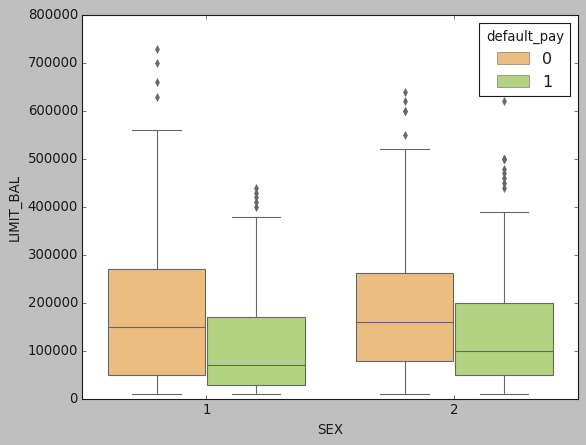

In [57]:
# Displays boxplot "SEX" vs "default_pay" with hue="default_pay" of variables 
sns.boxplot(x='SEX', y='LIMIT_BAL', hue='default_pay', data=CreditCard_dataset,palette="RdYlGn")

#### Correlation
Variables within a dataset can be related for many reasons.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.
- Positive Correlation: Both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: Variables change in opposite directions.

##### Observing Correlations between Features of the Dataset

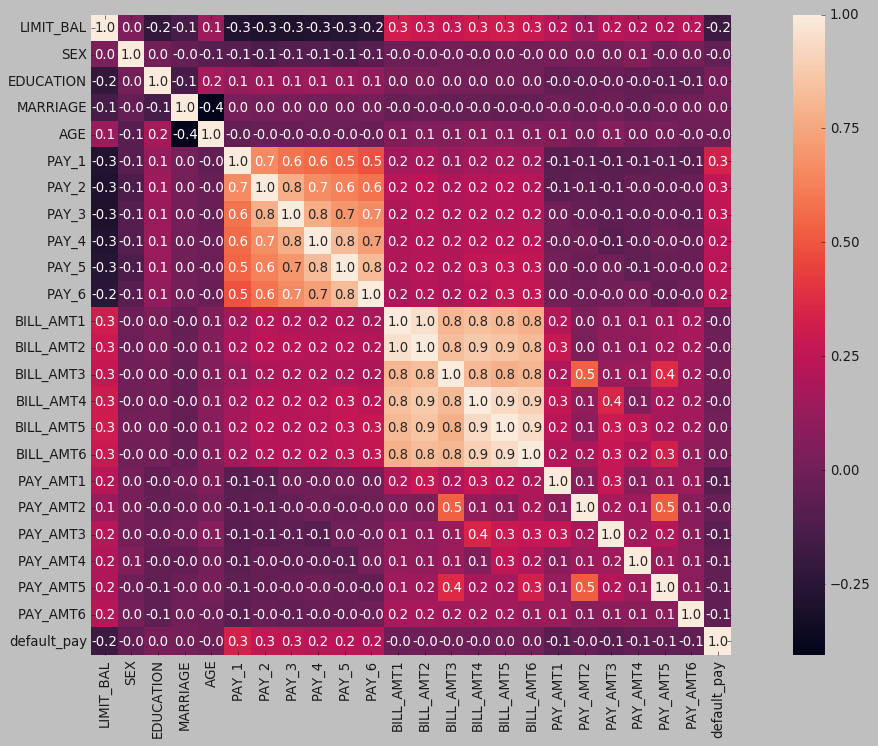

In [58]:
# Compute pairwise correlation of columns
correlation = CreditCard_dataset.corr()

plt.subplots(figsize=(20,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

##### As the above heatmap shows, certain features are correlated with each other (collinearity), such us PAY_1,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.

##### It appears that the PAY_1 and PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.


##### Check the correlation of bill amount (BILL_AMT1, BILL_AMT2, …BILL_AMT6) of statement in the April 2005 - September 2005

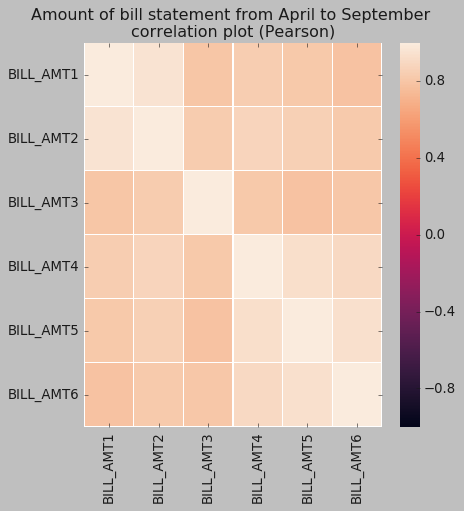

In [59]:
#
variable1  = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (6,6))
plt.title('Amount of bill statement from April to September \ncorrelation plot (Pearson)')
corr = CreditCard_dataset[variable1].corr()
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

#### Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

#### Checking the correlation of Amount of bill statement in April - September 2005

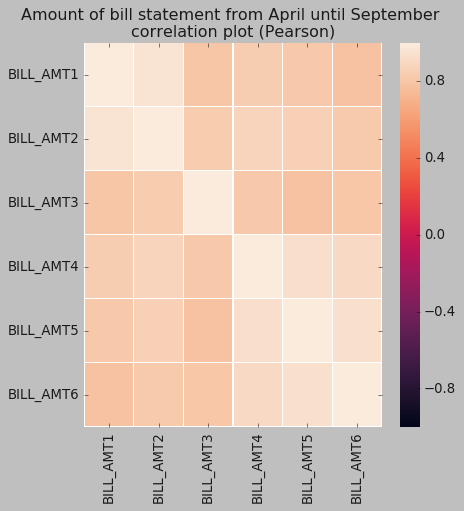

In [60]:
variable2 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (6,6))
plt.title('Amount of bill statement from April until September \ncorrelation plot (Pearson)')
corr = CreditCard_dataset[variable2].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

#### Separating fit correlated and uncorrelated data via linear regression:

Uncorrelated data are poentially more useful: discriminatory!


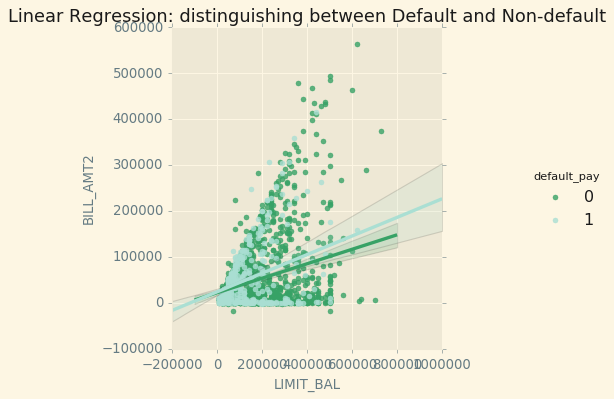

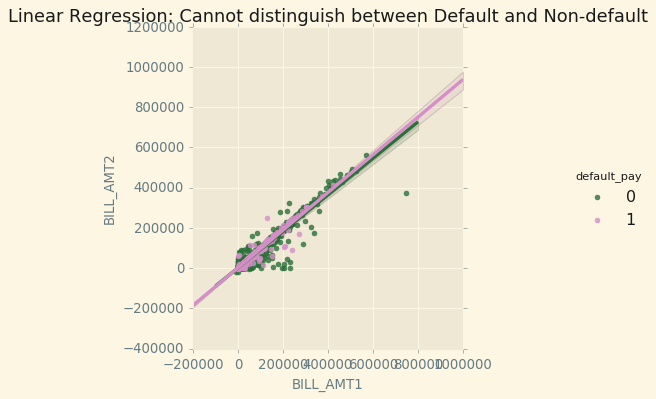

In [61]:
# use "Solarize_Light2" style
plt.style.use('Solarize_Light2')
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = CreditCard_dataset, hue ='default_pay', palette='BuGn_r')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)

sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = CreditCard_dataset, hue ='default_pay', palette='cubehelix')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discriminatory!')

#### Correlation decreases with distance between months. Lowest correlations are between September - April.

#### Showing sex, education, age and marriage distributions.

###### Showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

    . 0 : unknown (let's consider as others as well)
    . 1 : married
    . 2 : single
    . 3 : others
Sex meaning is:
    . 1 : male
    . 2 : female

In [62]:
# Create boxplot_variation function with four variables
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=CreditCard_dataset, palette="RdYlGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

#### Age, sex, credit limit
Below is a boxplot showing credit amount limit distribution grouped by age and sex.

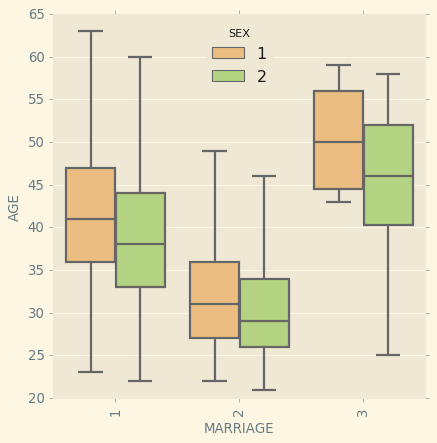

In [63]:
# The boxplot showing credit amount limit distribution grouped by age and sex
boxplot_variation('MARRIAGE','AGE', 'SEX',6)

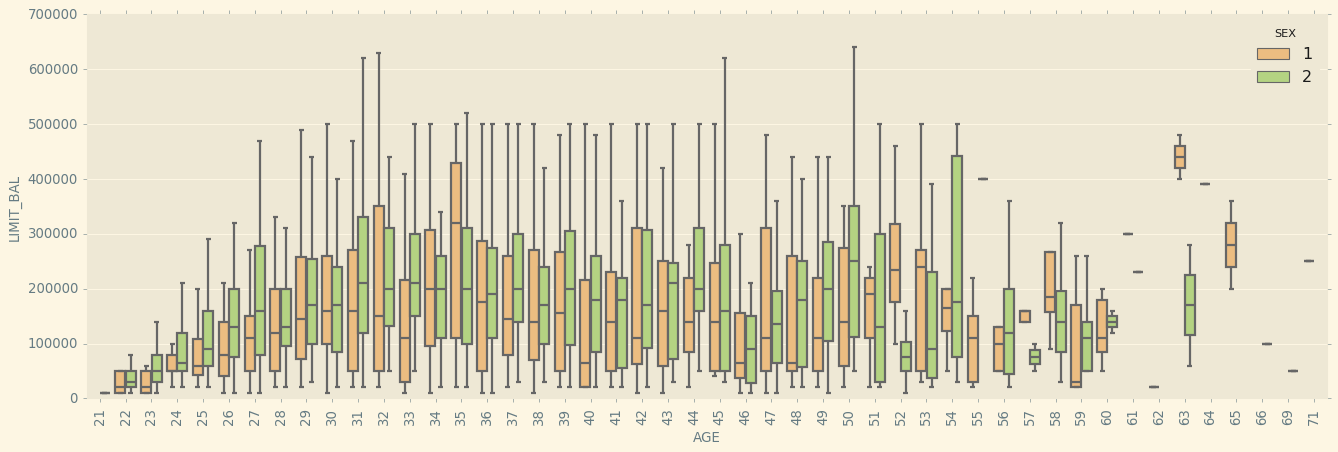

In [64]:
# The boxplot showing credit amount limit distribution grouped by age and sex
boxplot_variation('AGE','LIMIT_BAL', 'SEX',20)

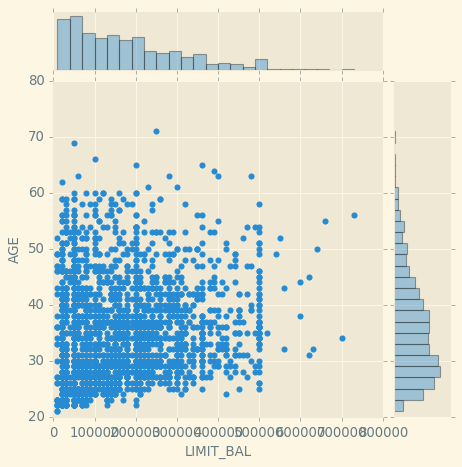

In [65]:
# Create joint plot "LIMT_BAL" vs "AGE"
sns.jointplot(x='LIMIT_BAL', y='AGE',data=CreditCard_dataset, kind="scatter")

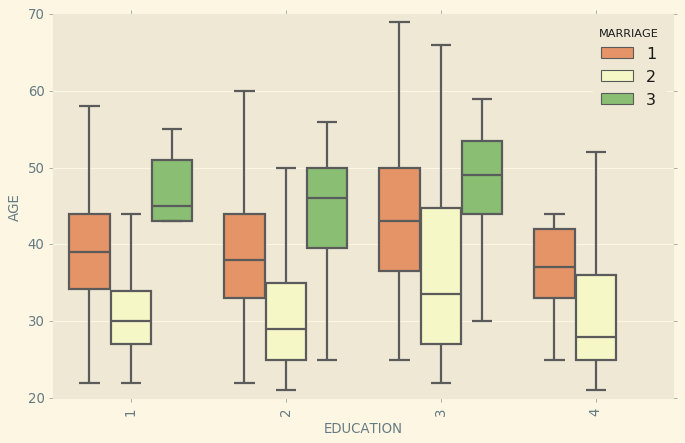

In [66]:
# The boxplot_variation showing credit amount limit distribution grouped by age and marriage
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',10)

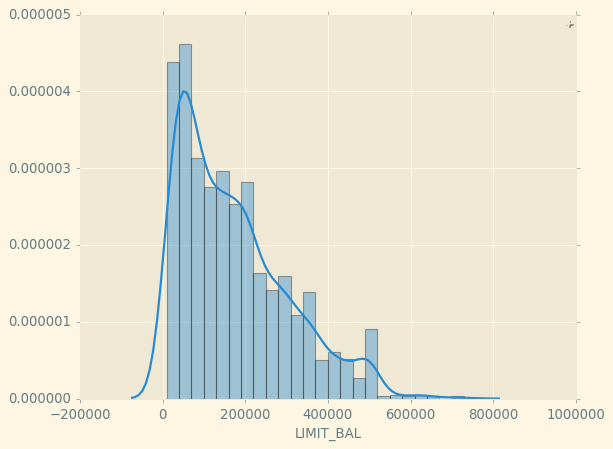

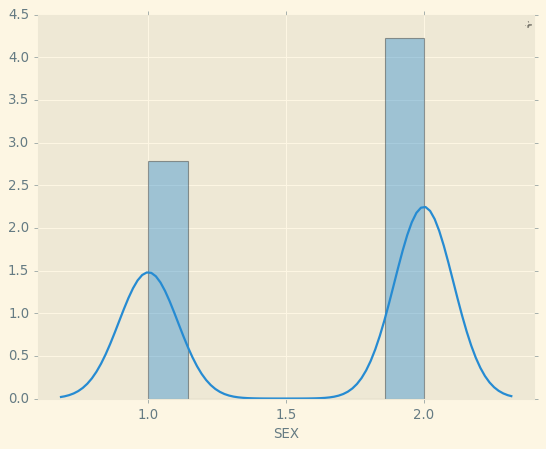

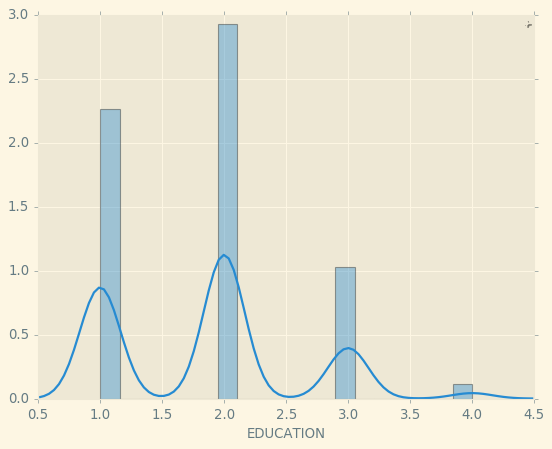

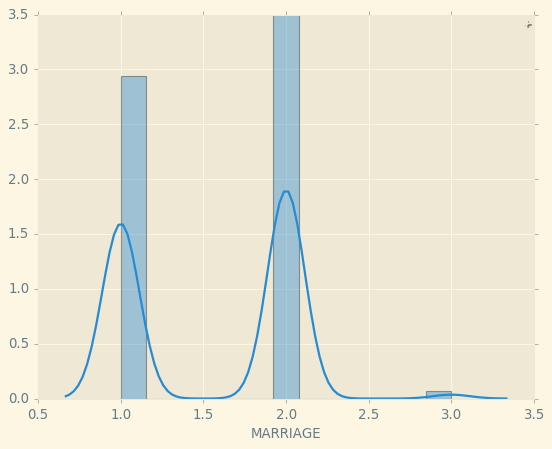

In [67]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
# Create plotDistPlot function
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.legend(fancybox=True, shadow=True, borderpad=0)
    plt.show()
    
plotDistPlot(CreditCard_dataset['LIMIT_BAL'])
plotDistPlot(CreditCard_dataset['SEX'])
plotDistPlot(CreditCard_dataset['EDUCATION'])
plotDistPlot(CreditCard_dataset['MARRIAGE'])

In [68]:
# merge and assign to x
x = (CreditCard_dataset.PAY_1 == -1) | (CreditCard_dataset.PAY_1==-2)
CreditCard_dataset.loc[x,'PAY_1']=0
CreditCard_dataset.PAY_1.value_counts()

x = (CreditCard_dataset.PAY_2 == -1) | (CreditCard_dataset.PAY_2==-2)
CreditCard_dataset.loc[x,'PAY_2']=0
CreditCard_dataset.PAY_2.value_counts()

x = (CreditCard_dataset.PAY_3 == -1) | (CreditCard_dataset.PAY_3==-2)
CreditCard_dataset.loc[x,'PAY_3']=0
CreditCard_dataset.PAY_3.value_counts()

x = (CreditCard_dataset.PAY_4 == -1) | (CreditCard_dataset.PAY_4==-2)
CreditCard_dataset.loc[x,'PAY_4']=0
CreditCard_dataset.PAY_4.value_counts()

x = (CreditCard_dataset.PAY_5 == -1) | (CreditCard_dataset.PAY_5==-2)
CreditCard_dataset.loc[x,'PAY_5']=0
CreditCard_dataset.PAY_5.value_counts()

x = (CreditCard_dataset.PAY_6 == -1) | (CreditCard_dataset.PAY_6==-2)
CreditCard_dataset.loc[x,'PAY_6']=0
CreditCard_dataset.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
6       2
5       2
Name: PAY_6, dtype: int64

In [69]:
# Display the frist few row
CreditCard_dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [70]:
# Display the last few rows
CreditCard_dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000.0,2,1,2,25,0,0,0,0,0,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15149,250000.0,1,1,1,53,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18667,50000.0,2,1,2,23,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3416,200000.0,2,2,1,37,0,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18715,420000.0,2,1,2,28,0,0,0,0,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


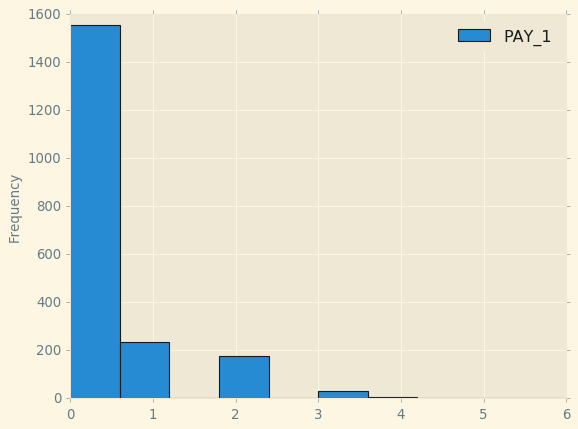

In [71]:
# Create plot for "PAY_1" columns
CreditCard_dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [72]:
# Descriptive statistics of "PAY_1" column
CreditCard_dataset['PAY_1'].describe()

count    2000.00
mean        0.35
std         0.73
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         6.00
Name: PAY_1, dtype: float64

In [73]:
# # Descriptive statistics of ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
CreditCard_dataset[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.35,0.30,0.29,0.26,0.23,0.24
std,0.73,0.77,0.77,0.76,0.72,0.74
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,6.00,5.00,8.00,7.00,7.00,7.00


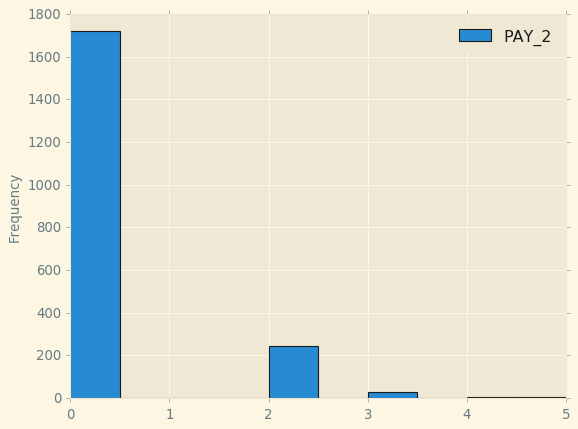

In [74]:
# # Create plot for "PAY_2" columns
CreditCard_dataset.plot(y = 'PAY_2',kind='hist')
plt.legend()
plt.show()

In [75]:
# Count unique values in column
CreditCard_dataset.SEX.nunique()

2

In [76]:
# Pass a list of columns to [] 
CreditCard_dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')

##### One-hot encoding for categorical variable
One-hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except for the index of the integer, which is marked with a 1.

In [77]:
# check number of rows and columns in dataset sample
CreditCard_dataset.shape

(2000, 24)

In [78]:
# Convert all columns to lower case
CreditCard_dataset.columns = CreditCard_dataset.columns.map(str.lower)

#### Scaling of Numerical Attributes

In [79]:
# Scaling of numerical attributes
columns_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
CreditCard_dataset[columns_to_norm] = CreditCard_dataset[columns_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [80]:
# Display the frist few rows to check if all columns are lower case
CreditCard_dataset.head(6)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.05,1,3,1,-0.38,0,0,0,0,0,...,0.61,0.26,-0.42,0.24,-9.03e-03,-0.10,-0.13,-0.25,-0.18,0
12574,-1.23,2,3,1,1.48,0,0,0,0,2,...,-0.65,-0.65,-0.64,-0.39,-1.59e-01,-0.15,-0.31,-0.30,-0.27,1
29677,-0.93,1,2,1,-0.82,0,0,0,0,0,...,0.02,-0.65,0.07,-0.39,9.94e-01,-0.18,-0.23,2.37,-0.20,0
8857,-0.70,2,3,1,1.81,2,2,3,3,3,...,-0.06,-0.03,0.02,-0.11,-1.19e-01,-0.21,-0.31,-0.21,-0.19,1
21099,0.75,1,1,2,-0.16,1,2,0,0,2,...,-0.33,-0.42,-0.37,-0.39,-5.89e-02,-0.19,-0.31,-0.19,-0.18,0
17459,-0.24,2,3,1,-0.60,0,0,0,0,2,...,0.57,0.38,0.35,-0.03,-4.63e-02,0.31,-0.31,-0.17,-0.16,0


In [81]:
# Display the last few rows
CreditCard_dataset.tail(6)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,
553,-0.93,1,1,1,2.25,0,0,0,0,0,...,-0.24,-0.18,-0.16,-0.20,-0.12,-0.23,-0.19,-0.22,-0.22,1
23296,-0.09,2,1,2,-1.14,0,0,0,0,0,...,-0.64,-0.49,-0.66,-0.32,0.13,-0.18,0.30,-0.31,0.19,0
15149,0.59,1,1,1,1.92,0,0,0,0,0,...,-0.67,-0.67,-0.66,-0.39,-0.16,-0.28,-0.31,-0.31,-0.27,1
18667,-0.93,2,1,2,-1.36,0,0,0,0,0,...,-0.67,-0.67,-0.66,-0.39,-0.16,-0.28,-0.31,-0.31,-0.27,0
3416,0.21,2,2,1,0.17,0,0,0,0,0,...,2.24,2.10,1.85,0.22,0.04,0.09,0.24,0.12,0.01,0
18715,1.89,2,1,2,-0.82,0,0,0,0,0,...,0.32,0.26,-0.14,-0.32,1.45,-0.17,-0.22,-0.24,-0.22,0


#### Predictive models

##### Split dataset into training (80%) and test set (20%)
I will set “test_size” to 0.2. This means that 20% of all the sample data will be used for testing, which leaves 80% of the data as training data for the model to learn from. Setting “random_state” to 1 ensures that we get the same split each time so that we can reproduce our results.

In [82]:
# Slices until the last column data frame
X = CreditCard_dataset.iloc[:,:-1].values
# Slices last column of data frame 
y = CreditCard_dataset.iloc[:,-1].values

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [83]:
# x train that shows rows and columns as a tuple (number of rows, number of columns) 
X_train.shape

(1600, 23)

In [84]:
# x test that shows rows and columns as a tuple (number of rows, number of columns) 
X_test.shape

(400, 23)

##### Machine Learning Algorithm

###### Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). This is a method for classification. This algorithm is used for the dependent variable, which is, Categorical. Y is modeled using a function that gives an output between 0 and 1 for all values of X. In logistic regression, the sigmoid (aka logistic) function is used

In [85]:
# import LogisticRegression from sklearn.linear_model package
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression(random_state=1)
# Fit model to train data
logisticmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
# Predicting the Test set output
y_pred = logisticmodel.predict(X_test)

In [87]:
# import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from from sklearn.metrics package
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

output = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
output



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.82,0.7,0.27,0.39,0.62


#### K-Nearest Neighbor

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithm. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks.
We can implement a KNN model by following the below steps:
1. Load the data
2. Initialize the value of k
3. To get the predicted class, iterate from 1 to the total number of training data points
4. Calculate the distance between test data and each row of training data. Here we will use 
5. Euclidean distance as our distance metric since it’s the most popular method. The other 
   metrics that can be used are Chebyshev, cosine, etc.
6. Sort the calculated distances in ascending order based on distance values
7. Get the top k rows from the sorted array
8. Get the most frequent class of these rows
9. Return the predicted class

##### Using the elbow method to pick a good K Value!
Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.


In [88]:
# import KNeighborsClassifier from sklearn.neighbors package
from sklearn.neighbors import KNeighborsClassifier

In [89]:
error_rate = []

# it may take take some time
for i in range(1,40):
    
    knnModel = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    # Fit model to train data
    knnModel.fit(X_train,y_train)
    # Predicting the Test set output
    pred_i = knnModel.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

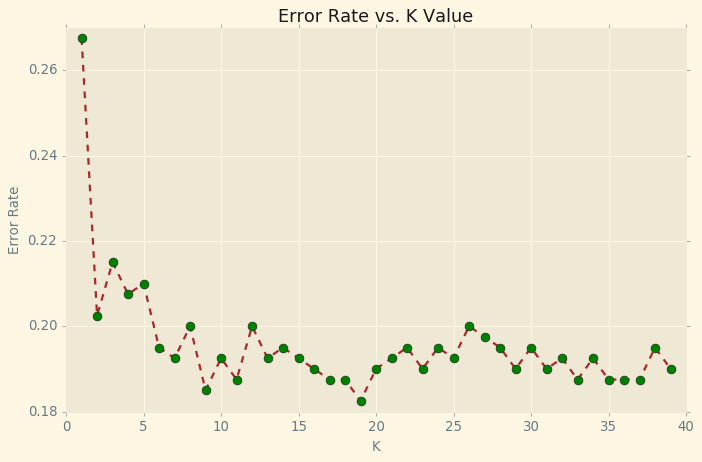

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='brown', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
# import KNeighborsClassifier from sklearn.neighbors package
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=7)

In [92]:
# Fit model to train data
knnModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [93]:
# Predicting the Test set output
y_pred = knnModel.predict(X_test)

In [94]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from sklearn.metrics package
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

output = pd.DataFrame([['K Nearest Neighbors', accuracy, precision, recall, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
output

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K Nearest Neighbors,0.81,0.64,0.21,0.32,0.59


##### k-Fold Cross-Validation

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.


To find the average of the 9 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [95]:
# import cross_val_score from sklearn.model_selection package
from sklearn.model_selection import cross_val_score
# import numpy as np

# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=7)

# Train model with cv of 9 
cv_scores = cross_val_score(knn_cv, X, y, cv=9)

# Print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.77578475 0.80269058 0.78923767 0.78026906 0.82432432 0.78378378
 0.79279279 0.78280543 0.81447964]
cv_scores mean:0.7940186701727192


Using cross-validation, our mean score is about 79.40%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#### Hypertuning model parameters using GridSearchCV
GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [96]:
from sklearn.model_selection import GridSearchCV

# Create new a knn model
knn2 = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}

# Use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=9)

# Fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=9, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
# Check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 31}

In [98]:
# Check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.812

By using grid search to find the optimal parameters for our model, we have improved our model accuracy by ≈ 2%.

#### Support Vector Machine
Generally, the use of Support Vector Machines (SVM) is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplanes in an iterative manner, which is used to minimize error.
##### Advantages
SVM Classifiers offer good accuracy and perform faster predictions compared to Naïve Bayes algorithms. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.
##### Disadvantages
SVM is not suitable for large datasets because of its high training time. It also requires more time in training compared with Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.


In [99]:
# Fitting SVM to the Training set
from sklearn.svm import SVC

scvModel = SVC(kernel = 'rbf', random_state = 0)
# Fit model to train data
scvModel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
# Predicting the Test set output
y_pred = scvModel.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
# Create confunsion matrix
confmatrix = confusion_matrix(y_test, y_pred)

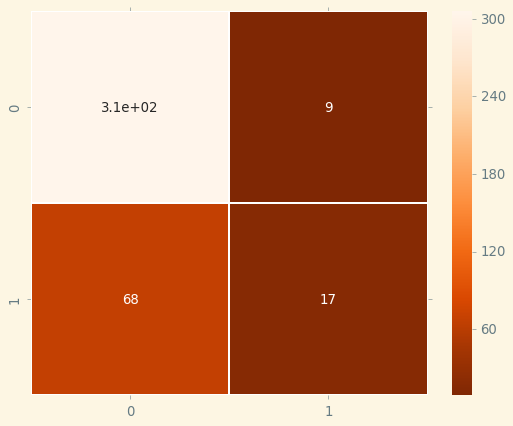

In [102]:
# Create heatmap of confusion matrix
sns.heatmap(confmatrix,annot= True,linewidths=1,cmap='Oranges_r')

In [103]:
# import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from sklearn.metrics package
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svmModel = pd.DataFrame([['Support Vector Machine', accuracy, precision, recall, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
svmModel

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.81,0.65,0.2,0.31,0.59


#### Gaussian Naive Bayes
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.

In [104]:
# import GaussianNB from sklearn.naive_bayes package
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
# Fit model to train data
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
# Predicting the Test set output
y_pred = naive_bayes.predict(X_test)

In [106]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
# Create confusion matrix
confu_matrix = confusion_matrix(y_test, y_pred)

In [107]:
# Print confusion matrix
confu_matrix

array([[262,  53],
       [ 40,  45]], dtype=int64)

In [108]:
# import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from sklearn.metrics package
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

nbModel= pd.DataFrame([['Gaussian Naive Bayes', accuracy, precision, recall, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
nbModel

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.77,0.46,0.53,0.49,0.68


#### Decision Tree Classification
A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

##### Advantages of Decision Trees 
1. The algorithm is simple to understand, interpret and visualize as the idea is mostly used in our daily lives. 

2. Decision Tree can be used for both classification and regression problems.

3. Decision Tree can handle both continuous and categorical variables.

4. No feature scaling (standardization and normalization) required in case of Decision Tree as it uses rule based approach instead of distance calculation.

5. Handles non-linear parameters efficiently.

6. Decision Tree can automatically handle missing values.

7. Decision Tree is usually robust to outliers and can handle them automatically.

8. Training period is less as compared to Random Forest because it generates only one tree unlike forest of trees in the Random Forest. 


##### Disadvantages of Decision Trees
1. Overfitting: This is the main problem of the Decision Tree. It generally leads to overfitting of the data which ultimately leads to wrong predictions. 

2. High variance: Decision Tree generally leads to the overfitting of data. Due to the overfitting, there are very high chances of high variance in the output which leads to many errors in the final estimation and shows high inaccuracy in the results.

3. Unstable: Adding a new data point can lead to re-generation of the overall tree and all nodes need to be recalculated and recreated. 

4. Affected by noise: Little bit of noise can make it unstable which leads to wrong predictions.

5. Not suitable for large datasets: If data size is large, then one single tree may grow complex and lead to overfitting. Thus, in this case, we should use Random Forest instead of a single Decision Tree.



In [109]:
# import DecisionTreeClassifier from sklearn.tree package
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [110]:
# Fit model to train data
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [111]:
# Predicting the Test set output
y_pred = dct.predict(X_test)

In [112]:
# import confusion matrix from sklearn.metrics package 
from sklearn.metrics import confusion_matrix
# Create confusion matrix to compute and evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, y_pred)

In [113]:
# Print confusion matrix
conf_matrix

array([[262,  53],
       [ 61,  24]], dtype=int64)

In [114]:
# import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from sklearn.metrics package 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

dsModel = pd.DataFrame([['Decision Tree Classifier', accuracy, precision, recall, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
dsModel

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.71,0.31,0.28,0.3,0.56


#### Random Forest Classification
Random forest is a supervised learning algorithm which is used for both classification as well as regression. However, it is mainly used for classification problems. As we know, a forest is made up of trees, and more trees means a more robust forest.
1. Pick at random K data points from the training set
2. Build the Decision tree associated to these K data points
3. Choose the number of trees(n) you want to build and repeat number 1 and number 2
For new data points, make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote


In [115]:
# import random forest from sklearn.ensemble package
from sklearn.ensemble import RandomForestClassifier
ranfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 0)

In [116]:
# Fit model to train data
ranfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [117]:
# Predicting the Test set output
y_pred = ranfc.predict(X_test)

In [118]:
# import confusion_matrix from sklearn.metrics package
from sklearn.metrics import confusion_matrix
# Create confusion matrix to compute and evaluate the accuracy of a classification
confmatrix = confusion_matrix(y_test, y_pred)

In [119]:
# Print confusion matrix
confmatrix

array([[302,  13],
       [ 62,  23]], dtype=int64)

In [120]:
# import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score from sklearn.metrics package
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

output = pd.DataFrame([['Random tree Classifier', accuracy, precision, recall, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

output

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.81,0.64,0.27,0.38,0.61


#### Summary of predictive models
Model  Accuracy	Precision  Recall  F1 Score	 Roc
1.	Logistic Regression	          0.82	0.70	0.27	0.39 0.62
2.	K-Nearest Neighbor	          0.81	0.64	0.21	0.32 0.59
3.	Support Vector Machine	      0.81	0.65	0.20	0.31 0.59
4.	Gaussian Naive Bayes	      0.77	0.46	0.53	0.49 0.68
5.	Decision Tree Classification  0.71	0.31	0.28	0.30 0.56
6.	Random Forest Classification  0.81	0.64	0.27	0.38 0.61

#### Models analysis 
As displayed in the above table, which contains a summary of the predictive model the logistic regression model is the best model.  Therefore, I would like to suggest implementing a logistic regression model for this kind of business

### Conclusion
Overall, this project analyzes data regarding credit card payment defaults. The purpose of the project is to predict the likelihood of default based on individual and prior payment information in order to deliver solutions to the bank credit card customer agency using data science approaches.  I investigated the data, checked data unbalancing, visualized the data’s features, and worked to understand the relationships between the different features. I then investigated six predicative models, finding “Logistic Regression” to be the best model for this specific business.  In general, I was able to practice and review my previous data sciences classes such as “Machine Learning” and “Data Collection and Preparation.” Besides that, I was able to learn new techniques such as how to check unbalance data and how to work on cross validation using Python in pandas and so on.  Moreover, I was able to practice and utilize the data statistics that I have learned about so far in the Data Science course programs.  Overall, this project was very interesting; it gave me the opportunity, to practice data visualization and also to work widely with machine learning algorithms using Python 3 in panda.

#### References
Allibhai, E. (2018). Towards Data Science. Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn. Retrieved from https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
Brownlee, J. (August 2019). Machine Learning Mastery. Making Developers Awesome at Machine Learning. Retrieved from https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201
Harrison, O. (2018). Towards Data Science.  Machine Learning Basics with the K-Nearest Neighbors Algorithm. Retrieved from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
Hills, K., Madhapur, Hyderabad, Telangana. (2020). Tutorials Point. Classification Algorithms - Random Forest. Retrieved from https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm
Navlani, A. (2020). DataCamp. Decision Tree Classification in Python. 
Retrieved from https://www.datacamp.com/community/tutorials/decision-tree-classification-python
Navlani, A. (2020). Support Vector Machines with Scikit-learn. Data Camp.  
Retrieved from  https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#svm
Kumar, N. (2012). The professional Point. Advantages and Disadvantages of Decision Trees in Machine Learning. Retrieved from http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of.html
L. Breiman, J. Friedman, R. Olshen, and C. Stone.  scikit-learn developers (BSD License). (2007 - 20200).  Decision Tree Classifier. Retrieved from: https://scikit-learn.org/stable/modules/tree.html#classification
Patel, H., Mantri, N. (2020). Gaussian Naive Bayes. Machine learning (LM). Retrieved from https://iq.opengenus.org/gaussian-naive-bayes/
William M.K. (2020). Research Methods Knowledge Base. Descriptive Statistics. 
Retrieved from https://conjointly.com/kb/descriptive-statistics/
